In [ ]:
#######################################################################
################## MSDS 458 - Assignment 1 ############################
################## Author: Shawn Liu ##################################
#######################################################################

In [1]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 

In [3]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.7.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.7.0


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Model Measurement Function Definition**

In [7]:
#accuracy
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [9]:
#plot confusion matrix (type I and II error)
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

**Load MNIST Digits Dataset**

In [10]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Data Exploration - EDA Traning and Testing Sets**

In [11]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


In [12]:
print("first 20 labels of training data:\n {}\n".format(y_train[:20]))

first 20 labels of training data:
 [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]



In [ ]:
### quick check on label data distribution by class

Counter(y_train).most_common()

**Preprocessing Data**

In [14]:
###preprocessing the data
###1. labels are to be converted with-one hot encoding
###2. features array are to be reshaped from (28, 28) to (784,)

In [15]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [16]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


In [17]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [18]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[1000])) #1000 is arbitrarily picked

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255 251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232 254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33 200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   1   0   0  12 25

In [19]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)


x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [20]:
print(set(x_train_reshaped[10]))

{0, 1, 128, 6, 7, 8, 137, 138, 139, 11, 141, 140, 18, 146, 19, 24, 25, 28, 31, 34, 164, 36, 166, 165, 40, 41, 42, 171, 177, 50, 51, 180, 239, 57, 63, 66, 197, 70, 73, 206, 207, 209, 210, 81, 84, 213, 214, 215, 89, 90, 219, 91, 93, 222, 224, 103, 232, 104, 105, 236, 238, 110, 112, 240, 242, 241, 244, 116, 118, 247, 246, 117, 250, 253, 254}


**Normalize the value per pixel**

In [21]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [22]:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


#**Experiment 4. PCA Feature Reduction / Trained on 154 PCA Features**

**1. Use PCA decomposition to reduce the number of features from 784 features to 154 features**

In [32]:
#Create a dataframe with the pixel values and class labels

#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train}
for k in range(0,784): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k] 
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.0,1.0,9.0,2.0,1.0,3.0,1.0,4.0,3.0,5.0,3.0,6.0,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pix_val_782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Separating out the features
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...] --》 return only the dictionary keys from second to last
x = pixel_df.loc[:, features].values 

column_list = []
for k in range(1,155): 
    column_list.append(f"pca_{k}")
pca = PCA(n_components=154)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = column_list)

In [37]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)
pixel_pca_df.head().round(3)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,...,pca_116,pca_117,pca_118,pca_119,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129,pca_130,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,pca_141,pca_142,pca_143,pca_144,pca_145,pca_146,pca_147,pca_148,pca_149,pca_150,pca_151,pca_152,pca_153,pca_154,actual_class
0,0.486,-1.226,-0.096,-2.179,-0.107,-0.912,0.918,0.627,-1.426,0.778,0.775,-0.996,-0.445,2.938,0.860,-0.018,1.295,1.212,1.089,0.652,0.108,-0.252,-0.852,0.981,0.181,0.393,-1.208,0.667,-0.492,-0.484,-0.384,0.136,0.421,0.332,-0.598,0.788,0.256,0.785,0.618,-1.411,...,-0.325,0.094,-0.236,0.240,-0.208,0.268,-0.239,0.212,0.196,0.166,0.106,-0.153,0.017,0.314,-0.224,-0.562,-0.045,0.175,-0.030,0.014,0.234,-0.191,0.097,-0.129,0.421,0.155,0.009,-0.025,-0.026,-0.102,0.076,-0.278,-0.101,0.071,-0.220,-0.150,-0.092,-0.007,-0.102,5
1,3.968,-1.156,2.339,-1.807,-3.244,-0.714,-0.177,-0.412,0.159,0.592,-1.123,-0.421,-1.252,0.357,-0.933,-0.635,-0.212,0.156,0.205,-0.400,0.826,-0.333,-0.006,0.072,0.910,0.843,0.048,0.193,-1.417,-0.336,0.136,-0.341,0.714,0.300,-0.578,0.352,-0.265,-0.066,0.289,0.166,...,-0.286,-0.251,-0.127,0.125,0.025,-0.172,0.060,-0.225,0.163,-0.149,0.008,0.068,-0.071,-0.095,0.167,0.025,0.147,-0.077,0.225,-0.244,0.074,0.083,0.191,-0.025,0.015,0.199,0.030,0.012,-0.119,0.233,0.196,0.240,-0.065,-0.041,0.079,-0.029,-0.020,-0.042,0.162,0
2,-0.203,1.538,-0.739,2.043,-1.203,-0.007,-3.369,1.445,-0.449,-0.700,1.767,-0.623,0.733,0.428,-0.568,-0.750,0.665,-0.479,-0.036,-1.704,-0.241,-0.016,0.472,-0.028,-0.510,0.339,0.687,0.552,0.051,-1.091,-0.156,0.426,-0.232,-0.314,0.228,0.743,0.732,-0.728,0.269,0.015,...,-0.218,-0.171,-0.297,0.227,0.046,-0.208,-0.442,0.376,0.074,0.174,0.008,0.014,-0.042,0.035,0.198,-0.348,-0.195,-0.252,0.246,0.490,-0.659,-0.194,0.195,-0.175,0.227,-0.371,-0.166,0.324,0.011,0.521,0.451,0.098,-0.238,0.104,0.266,0.412,-0.156,-0.170,-0.048,4
3,-3.134,-2.381,1.073,0.415,-0.007,2.744,-1.858,-0.264,1.187,0.044,-1.696,-0.686,0.957,0.650,-0.595,0.199,0.040,0.756,0.552,0.518,-0.255,-0.487,0.235,-0.370,0.507,0.052,-1.080,0.552,0.037,-0.467,0.041,-0.259,-0.310,-0.445,0.544,0.337,-0.012,-0.033,-0.174,0.274,...,0.095,0.203,0.178,-0.100,-0.129,-0.035,-0.246,0.122,0.020,0.022,0.064,0.038,-0.025,0.038,-0.068,-0.080,-0.206,0.008,-0.124,-0.023,0.032,0.087,0.072,0.060,-0.181,0.147,-0.101,0.103,-0.039,0.057,0.131,-0.005,-0.128,0.122,-0.133,0.072,0.072,-0.097,0.089,1
4,-1.501,2.865,0.064,-0.948,0.385,0.170,-0.359,-1.590,0.884,0.408,-1.364,1.803,-1.005,-1.232,0.233,-1.073,0.075,-0.706,0.256,-0.981,-0.027,-0.266,0.915,0.019,-0.005,0.323,-0.735,0.797,-0.499,0.283,0.287,0.459,-0.042,0.525,0.556,-0.144,-0.103,1.031,0.390,-0.477,...,-0.342,0.262,-0.198,0.081,0.250,0.031,-0.286,-0.407,-0.333,0.237,-0.136,0.003,-0.043,0.210,0.030,-0.159,-0.135,-0.096,-0.017,0.178,0.097,-0.041,-0.272,0.238,0.203,-0.249,0.105,-0.051,0.024,0.047,-0.029,-0.116,-0.073,0.043,0.228,-0.177,0.151,0.008,0.092,9


In [59]:
pca.explained_variance_ratio_

total_val = round(np.sum(pca.explained_variance_ratio_), 2)
print("total variance explained for training images is {}".format(total_val))

#we can tell the 154 PCA components explains 95% of variance

total variance explained for training images is 0.949999988079071


In [90]:
## prepare training and test data
x_all = np.concatenate((x_train_norm, x_test_norm), axis=0)
pca = PCA(n_components=154)
x_all_pca = pca.fit_transform(x_all)

x_train_pca = x_all_pca[0:60000,:]
x_test_pca = x_all_pca[60000:,:]

In [91]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(60000, 154)
(10000, 154)


**training on transfomed data which has been downsized from 784 to 154 dimensions**

In [92]:
###use Keras to compile DNN model. 196 hidden nodes are used as it returned best result from experiment 3

model = Sequential ([
    Dense(input_shape = [154], units=196, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 196)               30380     
                                                                 
 output_layer (Dense)        (None, 10)                1970      
                                                                 
Total params: 32,350
Trainable params: 32,350
Non-trainable params: 0
_________________________________________________________________


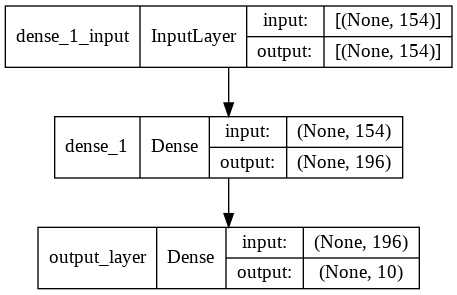

In [73]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True) 

In [94]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [95]:
###training the model


history = model.fit(
    x_train_pca,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3998 - accuracy: 0.9205 - val_loss: 0.2156 - val_accuracy: 0.9585
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1908 - accuracy: 0.9643 - val_loss: 0.1691 - val_accuracy: 0.9682
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1538 - accuracy: 0.9721 - val_loss: 0.1504 - val_accuracy: 0.9728
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1357 - accuracy: 0.9756 - val_loss: 0.1355 - val_accuracy: 0.9756
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1240 - accuracy: 0.9783 - val_loss: 0.1347 - val_accuracy: 0.9746
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1155 - accuracy: 0.9805 - val_loss: 0.1315 - val_accuracy: 0.9743
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1096 - accuracy: 0.9808 - val_loss: 0.1252 - val_ac

In [97]:
# ###model evaluation

loss, accuracy = model.evaluate(x_test_pca, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9779
test set accuracy:  97.79000282287598


In [ ]:
# The reason why the result of predict on PCA components of testing data return such low accuracy is because, 
# https://stats.stackexchange.com/questions/303602/why-does-pca-feature-reduction-make-accuracy-dramatically-worse/303607
# I think that most likely error is actually retraining PCA - if you fit PCA on train set, then fit classifier, and then try to run it on principal components retrieved from the test set, then you use incorrect parameter space for the classifier - classifier uses train set principal components as coordinates, and then you run it on test set PCs.

#so probably the best way to treat is to combine training and testing data, and apply PCA on it in one run so they are converted in same coordinates

In [98]:
### making predictions

preds = model.predict(x_test_pca)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


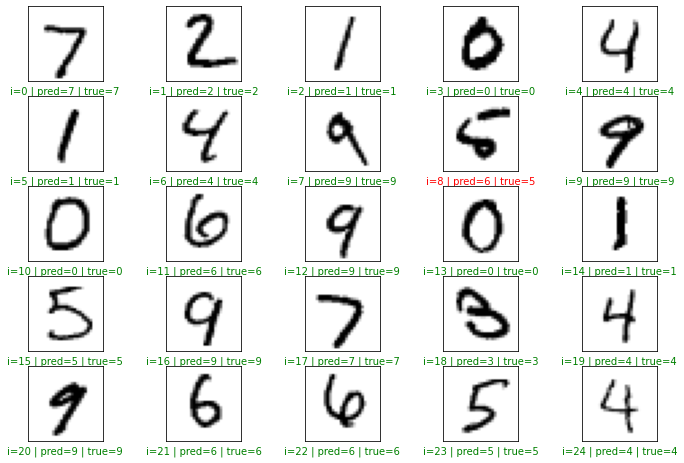

In [99]:
###Look at the first 25 - Plot test set images along with their predicted and actual labels to understand how the trained model actually performed

plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])   ###np.argmax returns the indices of the maximum values along an axis, which is the digit class with highest possibility
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

In [100]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [101]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

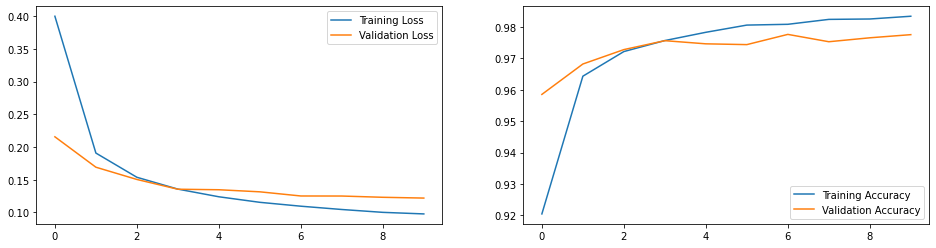

In [102]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [103]:
pred1= model.predict(x_test_pca)
pred1=np.argmax(pred1, axis=1)

In [104]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 0.9779
Root Mean Square Error: 0.6309516621738943


In [106]:
###create confusion matrix

pred_classes = np.argmax(model.predict(x_test_pca), axis=-1)
pred_classes;

In [107]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [108]:
#visualize the prediction result
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%,0.00%,99.97%,0.00%,0.01%
1,0.00%,0.00%,99.99%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2,0.00%,99.45%,0.15%,0.08%,0.04%,0.01%,0.00%,0.17%,0.11%,0.00%
3,99.87%,0.00%,0.01%,0.00%,0.00%,0.02%,0.04%,0.05%,0.00%,0.01%
4,0.00%,0.00%,0.01%,0.00%,99.77%,0.00%,0.00%,0.01%,0.00%,0.21%
5,0.00%,99.49%,0.01%,0.02%,0.03%,0.00%,0.00%,0.42%,0.02%,0.00%
6,0.00%,0.00%,0.00%,0.00%,99.37%,0.01%,0.00%,0.02%,0.28%,0.33%
7,0.00%,0.00%,0.00%,0.11%,0.57%,0.01%,0.00%,0.02%,0.01%,99.28%
8,0.00%,0.00%,0.00%,0.00%,0.00%,0.55%,99.42%,0.00%,0.02%,0.00%
9,0.00%,0.00%,0.00%,0.00%,0.12%,0.00%,0.00%,0.07%,0.07%,99.74%


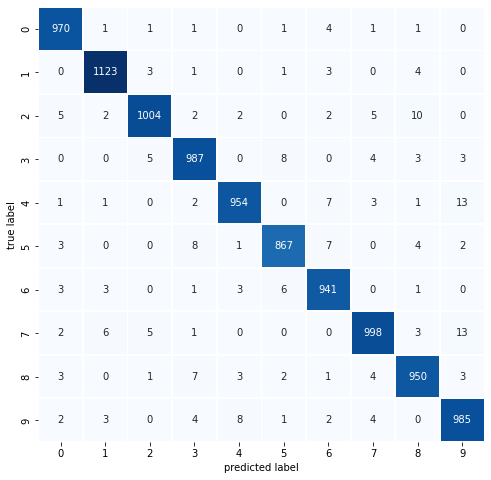

In [109]:
#visualize the confusion matrix

plot_confusion_matrix(y_test,pred_classes)

#**Experiment 5. Random Forest for feature importance evaluation model training**

1.   evaluate feature importance
2.   pick the top 70 features
3.   train the model on 70 top features and compare withmodel from expriment 3 and 4


In [110]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=44)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(random_state=44)

In [111]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

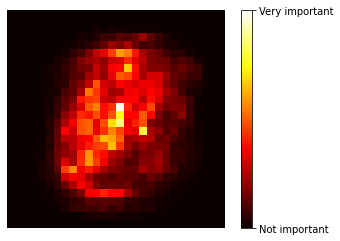

In [112]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [113]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels -》 argsort returns the index based on result in ascending order, so need to put - up in front
len(idx)

70

In [114]:
idx

array([350, 406, 437, 378, 405, 211, 489, 460, 461, 154, 542, 514, 568, 433, 347, 155, 290, 402, 430, 462, 381, 346, 238, 459, 263, 401, 409, 429, 377, 404, 375, 488, 239, 434, 354, 319, 543, 487, 567, 153, 291, 490, 318, 432, 349, 541, 373, 183, 656, 515, 513, 351, 408, 486, 570, 374, 156, 317, 212, 376, 516, 348, 326, 210, 657, 382, 379, 298, 266, 380])

In [115]:
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [116]:
###use Keras to compile DNN model. 196 hidden nodes are used as it returned best result from experiment 3

model = Sequential ([
    Dense(input_shape = [70], units=196, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)), #L2 is regularized factor
    Dense(name = 'output_layer', units=10, activation=tf.nn.softmax)
])

In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 196)               13916     
                                                                 
 output_layer (Dense)        (None, 10)                1970      
                                                                 
Total params: 15,886
Trainable params: 15,886
Non-trainable params: 0
_________________________________________________________________


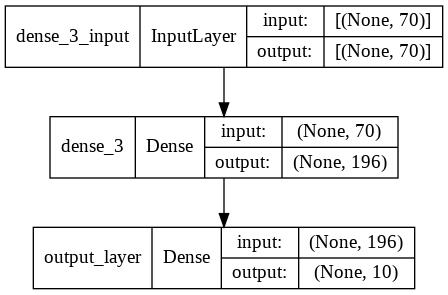

In [118]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True) 

In [123]:
###compile DNN model - select optimizer, lost function and evaluation metrics
### optimizer -> RMSprop
### loss function -> categorical cross entropy

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [124]:
###training the model

history = model.fit(
    train_images_sm,
    y_train_encoded,
    epochs = 200, 
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
)

Epoch 1/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6747 - accuracy: 0.8302 - val_loss: 0.4901 - val_accuracy: 0.8778
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4653 - accuracy: 0.8850 - val_loss: 0.4042 - val_accuracy: 0.9007
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4026 - accuracy: 0.8983 - val_loss: 0.3668 - val_accuracy: 0.9108
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3666 - accuracy: 0.9106 - val_loss: 0.3508 - val_accuracy: 0.9137
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3422 - accuracy: 0.9151 - val_loss: 0.3263 - val_accuracy: 0.9218
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3266 - accuracy: 0.9190 - val_loss: 0.3190 - val_accuracy: 0.9201
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.9227 - val_loss: 0.3132 - val_ac

In [125]:
### making predictions

preds = model.predict(test_images_sm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


In [137]:
loss, accuracy = model.evaluate(test_images_sm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.2833 - accuracy: 0.9301
test set accuracy:  93.01000237464905


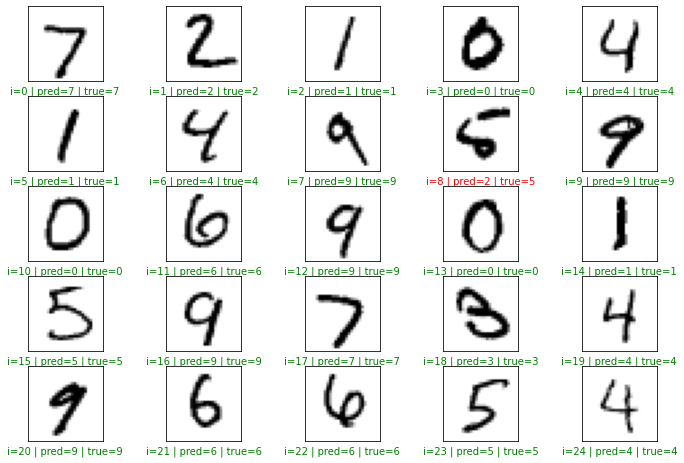

In [126]:
###Look at the first 25 - Plot test set images along with their predicted and actual labels to understand how the trained model actually performed

plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])   ###np.argmax returns the indices of the maximum values along an axis, which is the digit class with highest possibility
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

In [127]:
### Review performance

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [128]:
###plot the performance

losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

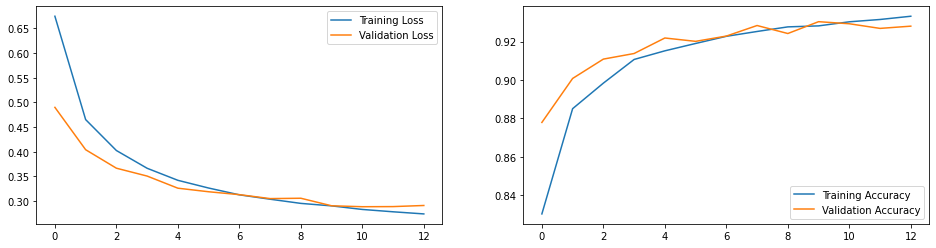

In [129]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))  ###metrics[0] -> ([losses, accs]; metrics[1] -> [val_losses, val_accs]; metrics[2] ->['Loss', 'Accuracy'])
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2])) 
    plt.legend()
plt.show()

In [130]:
pred1= model.predict(test_images_sm)
pred1=np.argmax(pred1, axis=1)

In [131]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.91      0.92      1032
           3       0.89      0.93      0.91      1010
           4       0.93      0.95      0.94       982
           5       0.91      0.83      0.87       892
           6       0.96      0.93      0.94       958
           7       0.95      0.92      0.93      1028
           8       0.92      0.94      0.93       974
           9       0.89      0.93      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Accuracy Score: 0.9301
Root Mean Square Error: 1.072100741535048


In [133]:
###create confusion matrix

pred_classes = np.argmax(model.predict(test_images_sm), axis=-1)
pred_classes;

In [134]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

In [135]:
#visualize the prediction result
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.27%,0.84%,0.00%,0.06%,0.00%,98.53%,0.02%,0.27%
1,19.75%,0.19%,68.66%,0.08%,0.00%,0.02%,11.01%,0.00%,0.30%,0.00%
2,0.00%,98.64%,0.16%,0.07%,0.27%,0.01%,0.03%,0.76%,0.06%,0.01%
3,99.98%,0.00%,0.00%,0.00%,0.00%,0.01%,0.01%,0.00%,0.00%,0.00%
4,0.00%,0.00%,0.41%,0.00%,93.82%,0.00%,0.17%,0.58%,0.05%,4.97%
5,0.00%,99.21%,0.03%,0.01%,0.02%,0.00%,0.00%,0.68%,0.05%,0.00%
6,0.00%,0.00%,0.06%,0.06%,95.73%,0.00%,0.01%,1.72%,0.07%,2.34%
7,0.00%,0.00%,0.00%,0.01%,0.29%,0.03%,0.00%,0.02%,0.02%,99.64%
8,0.00%,0.00%,98.40%,0.16%,0.52%,0.12%,0.07%,0.05%,0.32%,0.37%
9,0.00%,0.00%,0.00%,0.00%,1.11%,0.01%,0.00%,0.43%,0.18%,98.26%


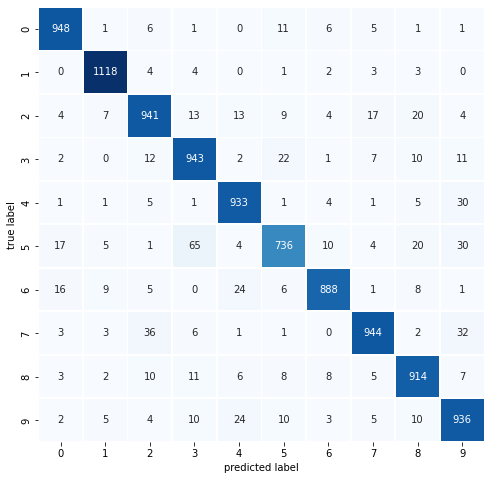

In [136]:
#visualize the confusion matrix

plot_confusion_matrix(y_test,pred_classes)

In [161]:
###performance comparison

performance = {}

performance['DNN Trained pixel data'] = 0.9677
performance['DNN Trainded on 154 PCA features'] = 0.9779
performance['DNN Trainded on 70 pixels RF'] = 0.9301

performance

{'DNN Trainded on 154 PCA features': 0.9779,
 'DNN Trainded on 70 pixels RF': 0.9301,
 'DNN Trained pixel data': 0.9677}

In [162]:
perf_df = pd.DataFrame.from_dict(performance, orient='index')
perf_df.columns = ['test_accuracy']
perf_df['experiment'] = perf_df.index

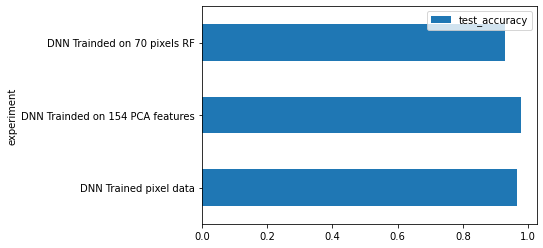

In [163]:
perf_df.plot.barh(x='experiment', y='test_accuracy')
